# IFT6269 - Homework 2 - Linear Classification

**Due**: Tuesday, October 18, 2022

#### Name: Tejas Vaidhya
#### Student ID: uv56320
#### Collaborators: 



### Introduction

In this assignment you will compare the performance of several algorithm on some synthetic classification tasks. The assignment consists of two parts: 1) a derivation of the estimators for the Fisher LDA with general covariance matrix derivation and 2) the implementation of several classification algorithms.

### Tasks
0.   Get your own copy of this file via "File > Save a copy in Drive...",
1.   Fill your personal information and collaborators at the top of this assignment, and rename the notebook accordingly, e.g., `hw2_thomasBayes.ipynb`
2.   Read the instructions provided on each section and cell carefully,
3.   Answer the section **Math Questions on Fisher LDA**,
4.   Implement the requested algorithms in section **Playground** following the example provided in dummy_model`,
5.   In section **Model Comparison**, for each of the datasets:
    *   use the training data to estimate the parameters of each of the 4 algorithms,
    *   plot the corresponding estimated decision boundary and the training set using the function `plot_results`, 
    *   compute the training and test accuracy and fill the table in each section by hand,
    *   compare the performance of each of the algorithms and provide an explanation for your observations based on, for example, their accuracy, overfitting/generalization properties, whether the assumptions of each algorithms are satisfied by the data, etc. 
    
**Important**: You are allowed to collaborate with other students in both the math and coding parts of this assignment. However, the answers provided here must reflect your individual work. For that reason, you are not allowed to share this notebook, except for your submission to the TA for grading. **Don't forget to pin and save the version of the notebook you want to be graded on!**

In [ ]:
!wget http://www.iro.umontreal.ca/~slacoste/teaching/ift6269/A20/notes/hwk2data.zip
!unzip hwk2data.zip

import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

--2022-10-16 00:48:02--  http://www.iro.umontreal.ca/~slacoste/teaching/ift6269/A20/notes/hwk2data.zip
Resolving www.iro.umontreal.ca (www.iro.umontreal.ca)... 132.204.26.36
Connecting to www.iro.umontreal.ca (www.iro.umontreal.ca)|132.204.26.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70575 (69K) [application/zip]
Saving to: ‘hwk2data.zip’

hwk2data.zip        100%[===================>]  68.92K   191KB/s    in 0.4s    

2022-10-16 00:48:03 (191 KB/s) - ‘hwk2data.zip’ saved [70575/70575]

Archive:  hwk2data.zip
  inflating: hwk2data/classificationA.test  
  inflating: hwk2data/classificationA.train  
  inflating: hwk2data/classificationB.test  
  inflating: hwk2data/classificationB.train  
  inflating: hwk2data/classificationC.test  
  inflating: hwk2data/classificationC.train  


You get 3 different datasets (**A**, **B**, **C**) with a training and test set for each, i.e., 6 sets in total. Each row represents a sample of data $(x_i, y_i)$. There are three columns: the first two give the coordinates for $x_i \in \mathbb{R}^2$; the third column gives the class label $y_i \in \{0, 1\}$. The datasets are all generated from some kind of mixture of Gaussians generative model. The train and test sets are generated from the same distribution for each types of dataset. 

To help your interpretation, we give you the actual
generating process. However, keep in mind that normally we would not know the information about the generating process. In this
assignment, we will compare different classification approaches.
*  **Dataset A**: the class-conditionals for this dataset are Gaussians with different means, but with a shared covariance matrix $\Sigma$.
*  **Dataset B**: similar generating process but the covariance matrices are different for the two classes.
*  **Dataset C**: here one class is a mixture of two Gaussians, while the other class is a single Gaussian (with no sharing).

Test the different models learnt from the corresponding training data on these test data. Compute for each model the accuracy (i.e.  the fraction of the data correctly classified) on the training set and compute it as well for the test set. And compare the performances of the different methods on the three datasets.


In [ ]:
data = {}

for d_ix in ["A", "B", "C"]:
    for t_flag in ["train", "test"]:
        data[t_flag + "_" + d_ix] = np.loadtxt("/content/hwk2data/classification"+d_ix+"."+t_flag)

### Models

**Fisher LDA**
>  We first consider the Fisher LDA model as seen in class: given the class variable, the data are assumed to be Gaussians with different means for different classes but with the same covariance matrix: $Y \sim \text{Bernoulli}(\pi)$, $X | \{Y = j\} \sim \mathcal{N}(\mu_j, \Sigma)$.

**Logistic Regression**
>  Implement logistic regression for an affine function $f(x) = w^Tx+b$ (do not forget the constant term – you can use the bias feature trick) using the IRLS algorithm (Newton’s method) which was described in class. Hint: never compute the matrix inverse by itself – this is not numerically stable when the Hessian might become ill-conditioned.

**Linear regression**

> As mentioned in class, we can forget that the class $y$ can only take the two values $0$ or $1$ and think of it as a real-valued variable on which we can do standard linear regression (least-squares). Here, the Gaussian noise model on $y$ does not make any sense from a generative point of view; but we can still do least-squares to estimate the parameters of a linear decision boundary (you’ll be surprised by its performance despite coming from a “bad”
generative model!). Implement linear regression (for an affine function $f(x) = w^Tx + b$) by solving the normal equations on each dataset (with no regularization).


**QDA**
>  We finally relax the assumption that the covariance matrices for the two classes are the same. So, given the class label, the data are now assumed to be Gaussian with means and covariance matrices which are a priori different:
$Y \sim \text{Bernoulli}(\pi)$, $X | \{Y = j\} \sim \mathcal{N}(\mu_j, \Sigma_j)$.

## Math Questions on Fisher LDA

This week's math questions will be typed directly in this notebook, i.e., no scanned hand-written answers accepted! You can use standard $\LaTeX$ syntax here!



**Question A:** Derive the form of the maximum likelihood estimator for the Fisher LDA model described above. Hint: you can re-use some of the tricks presented in class for the MLE of a multivariate Gaussian, but adapted to this setting. You can get inspiration from Section 7.2 in Mike’s book (which covers the case where $\Sigma$ is diagonal).

**Answer:**

Conditional probabilities follows multivarient Gaussian Distribution 

$p(x|y=j)$ = $\mathcal{N}(x|\mu_j, \Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|{1/2}} \exp\left(-\frac{1}{2}(x-\mu_j)^T\Sigma^{-1}(x-\mu_j)\right)$  


$y \in \{0,1\}$ be a Bernoulli random variable as given below  

$p(y| \hat{π} ) = \hat{\pi}^{y}(1 -\hat{π})^{1-y}$ 


Given data set
$D = \{(x_i, y_i); i=1, ... n\}$  


$l(θ ; D) = log (\prod_{i=1}^n p(y_i; \hat{\pi}) . p(x_i|y_i, θ ) )$

$l(θ ; D) = log (\prod_{i=1}^n p(y_i; \hat{\pi}) . p(x_i|y_i=0, \mu_0, Σ )^{1-y_i}. p(x_i|y_i=1, \mu_1 Σ )^{y_i} )$


let $θ =\{ \mu_0, \mu_1, Σ \}$

The log likehood function will be   
$\implies$ $l(θ  ; D) = log( \prod_{i=1}^n \hat{π}^{y_i} (1-\hat{π})^{1-y_i} . (\mathcal{N}(x_i|\mu_1, \Sigma))^{y_i} (\mathcal{N}(x_i|\mu_0, \Sigma))^{1-y_i} )$

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; = \sum_{i=1}^n [y_i  log (\hat{π})+(1-y_i)log(1-\hat{π}) + y_i. log (\mathcal{N}(x_i|\mu_1, \Sigma)) + (1-y_i)log(\mathcal{N}(x_i|\mu_0, \Sigma))]$

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; =  \sum_{i=1}^n [y_i( log (\hat{π})+ log (\mathcal{N}(x_i|\mu_1, \Sigma) ) )+(1-y_i)(log(1-\hat{π}) + log(\mathcal{N}(x_i|\mu_0, \Sigma))]$

$\implies$ $\frac{∂(θ  ; D)}{∂\hat{\pi}}$ =  $\sum_{i=1}^n (\frac{y_i}{\hat{\pi}} - \frac{1-y_i}{1- \hat{\pi}}) $ 


$\implies$ $\sum_{i=1}^n \frac{y_i}{\hat{\pi}} - \sum_{i=1}^n \frac{1-y_i}{1- \hat{\pi}} $ = 0

$\sum_{i=1}^n y_i$ = Number of datapoints with label 1 (say $N_1$)

$\sum_{i=1}^n (1-y_i)$ = Number of datapoints with label 0 (say $N_0$)

$\implies$ $\frac{N_1}{\hat{\pi}} - \frac{N_0}{1- \hat{\pi}} $ = 0


\begin{align}
\hat{\pi} = \frac{N_1}{(N_1 +  N_0)}
\end{align}

Let say, $p_1 = \hat{\pi} = \frac{N_1}{(N_1 +  N_0)} $ and $p_0 = 1-\hat{\pi} = \frac{N_0}{(N_1 +  N_0)}$

**Sloving for $\mu_0$**  

$\implies$ $\frac{∂(θ  ; D)}{∂\mu_0}$ =  $\sum_{i=1}^n \frac{∂}{d\mu_0}[log(N(x_i| μ_0 , Σ)). (1-y_i)]  $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; $ =  $\sum_{i=1}^n \frac{∂}{∂\mu_0}[1/2(- log(2\pi)- log(|Σ|) - (x_i-\mu_0)^T\Sigma^{-1}(x_i-\mu_0) ). (1-y_i)]  $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \;$ =  $\sum_{i=1}^n \frac{∂}{∂\mu_0}[- 1/2( (x_i-\mu_0)^T\Sigma^{-1}(x_i-\mu_0) ). (1-y_i)]  $

Using the following property $\frac{\partial w^{T}Aw}{\partial w}= 2Aw$	


$\implies$ $\frac{∂(θ  ; D)}{∂\mu_0}$ =  $\sum_{i=1}^n \frac{1}{2}2.\Sigma^{-1} (x_i-\mu_0).(1-y_i) = 0  $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; = \sum_{i=1}^n  (x_i-\mu_0).(1-y_i) = 0 $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; \implies \sum_{i=1}^n  x_i.(1-y_i)- \mu_0. \sum_{i=1}^n (1-y_i) = 0 $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; \implies \sum_{i=1}^n  x_i.(1-y_i) =  \mu_0. N_0 $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; \implies \sum_{i=1}^n  (x_i.(1-y_i)) / N_0 =  \mu_0 $


\begin{align}
\mu_0 = \frac{\sum_{\{y_i=0\}} x_i}{N_0}   
\end{align}

Note: The above simplification will be helpful for coding part 

**Similarly Sloving for $\mu_1$**  

$\implies$ $\frac{∂(θ  ; D)}{∂\mu_1}$ =  $\sum_{i=1}^n \frac{ ∂}{d\mu_1}[log(N(x_i| μ_1 , Σ)). y_i]  $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; =$   $\sum_{i=1}^n \frac{∂}{∂\mu_1}[1/2(- log(2\pi)- log(|Σ|) - (x_i-\mu_1)^T\Sigma^{-1}(x_i-\mu_1) ). y_i]  $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; = $ $\sum_{i=1}^n \frac{∂}{d\mu_1}[- 1/2( (x_i-\mu_1)^T\Sigma^{-1}(x_i-\mu_1) ). (y_i)]  $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; \implies$  $\sum_{i=1}^n \frac{1}{2}2.\Sigma^{-1} (x_i-\mu_1).y_i = 0  $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; \implies \sum_{i=1}^n  (x_i-\mu_1).(y_i) = 0 $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; \implies \sum_{i=1}^n  x_i.y_i -\mu_1.\sum_{i=1}^n (y_i) = 0 $

$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; \implies \sum_{i=1}^n  x_i.y_i  = \mu_1.N_1  $

\begin{align}
\mu_1 = \frac{\sum_{\{y_i=1\}}  x_i} {N_1}  
\end{align}

**Sloving for $Σ$**

we will take derivate with respective to $Σ^{-1}$

$\implies$ $\frac{∂(θ  ; D)}{∂\ Σ^{-1}}$ =  $ \frac{\partial}{\partial \ Σ^{-1}}  \sum_{i=1}^n [-\frac{y_i}{2}log(|Σ|) -\frac{(1-y_i)}{2}log(|Σ|) -\frac{y_i}{2} (x_i-\mu_1)^T\Sigma^{-1}(x_i-\mu_1)-\frac{(1-y_i)}{2} (x_i-\mu_0)^T\Sigma^{-1}(x_i-\mu_0)]   $


Using $\frac{\partial}{\partial A}[X^{T}AX] =\frac{\partial}{\partial A}[tr(XX^{T}A)] = [XX^{T}]^T = XX^T  $	


$\implies$ $\frac{\partial l(θ  ; D)}{\partial \ Σ^{-1}}$ =  $\frac{\partial }{\partial Σ^{-1}}[- \frac{1}{2} N_1 log(|Σ|) - \frac{1}{2}N_0 log(|Σ|)] -\sum_{i=1}^n \frac{y_i}{2} (x_i-\mu_1)(x_i-\mu_1)^T-\sum_{i=1}^n \frac{(1-y_i)}{2} (x_i-\mu_0)(x_i-\mu_0)^T 	$ 


$\; \; \; \; \; \;  \; \; \; \; \; \;\; \; \; \; \; \; \;$ =  $\frac{\partial }{\partial Σ^{-1}}[ \frac{1}{2} (N_0 + N_1) log(|Σ|^{-1}) ] -\frac{N_1}{2} \sum_{i=1}^n (\frac{y_i}{N_1} (x_i-\mu_1)(x_i-\mu_1)^T)-\frac{N_0}{2} \sum_{i=1}^n \frac{(1-y_i)}{N_0} (x_i-\mu_0)(x_i-\mu_0)^T 	$ 

$\implies$  $\frac{1}{2}.(N_0 + N_1).Σ -\frac{N_1}{2} \sum_{y_i=1} (\frac{1}{N_1} (x_i-\mu_1)(x_i-\mu_1)^T)-\frac{N_0}{2} \sum_{y_i=0} (\frac{1}{N_0} (x_i-\mu_0)(x_i-\mu_0)^T ) $ = 0

we have $\frac{1}{N_1}  (\sum_{y_i=1} (x_i-\mu_1)(x_i-\mu_1)^T) = E_1$ and $ \frac{1}{N_0}(\sum_{y_i=0}  (x_i-\mu_0)(x_i-\mu_0)^T) = E_0$


\begin{align}
Σ = \frac{N_0.E_0 + N_1. E_1}{(N_0 + N_1)} = p_0.E_0 + p_1. E_1
\end{align}



**Question B:** What is the form of the conditional distribution $p(y = 1|x)$? Compare with the form of logistic regression

**Answer:** 
p(y=1|x) = $\frac{\hat{\pi} \mathcal{N}(x|\mu_1, \Sigma)}{\hat{\pi} \mathcal{N}(x|\mu_1, \Sigma) + (1-\hat{\pi}) \mathcal{N}(x|\mu_0, \Sigma)}$
(using bayes theorem)

p(y=1|x) = $\frac{1}{1+ \frac{(1-\hat{\pi}) \mathcal{N}(x|\mu_0, \Sigma)}{\hat{\pi} \mathcal{N}(x| \mu_1, \Sigma)}} $

Let $f(x)  = \frac{(1-\hat{\pi}) \mathcal{N}(x|\mu_0, \Sigma)}{\hat{\pi} \mathcal{N}(x| \mu_1, \Sigma)}$

$p(y=1|x) = \frac{1}{1+ exp(-log(f(x)^{-1}))} $

$p(y=1|x) = σ(log(f(x)^{-1}))$

Already we can see form similar to logistic regression 

**Sloving $log(f(x)^{-1})$** 

*Note*: $f(x)^{-1} = \frac{1}{f(x)}$

$ \implies log(f(x)^{-1}) = log[\frac{\hat{\pi} \mathcal{N}(x| \mu_1, \Sigma)} {(1-\hat{\pi}) \mathcal{N}(x|\mu_0, \Sigma)}] $

$\; \; \; \; \; \;  \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; = log(\hat{\pi}\mathcal{N}(x| \mu_1, \Sigma)) - log((1-\hat{\pi})\mathcal{N}(x| \mu_0, \Sigma)) $

$\; \; \; \; \; \;  \; \; \; \; \; \; \; \; \; \; \; \; \; \; \;  = log[\frac{\hat{\pi}}{1-\hat{\pi}}] -\frac{1}{2}[(x-\mu_1)^T(x)\Sigma^{-1}(x-\mu_1) - (x-\mu_0)^T(x)\Sigma^{-1}(x -\mu_0)]$

We know $Σ^{-1}$ is symmetric $a^TΣ^{-1}b = b^{T}Σ^{-1}a$, where a and b are two vectors 

$ \; \; \; \; \; \;  \; \; \; \; \; \; \; \; \; \; \; \; \; \; \;  = log[\frac{\hat{\pi}}{1-\hat{\pi}}] -\frac{1}{2}[x^T \Sigma^{-1}x - 2 \mu_1^TΣ^{-1}x+ \mu_1^{T}Σ^{-1}\mu_1 - x^T \Sigma^{-1}x + 2 \mu_0^TΣ^{-1}x- \mu_0^{T}Σ^{-1}\mu_0 ]$

$\; \; \; \; \; \;  \; \; \; \; \; \; \; \; \; \; \; \; \; \; \;  = log[\frac{\hat{\pi}}{1-\hat{\pi}}] -\frac{1}{2}[ - 2 \mu_1^TΣ^{-1}x + 2 \mu_0^TΣ^{-1}x + \mu_1^{T}Σ^{-1}\mu_1 - \mu_0^{T}Σ^{-1}\mu_0 ]$


$\; \; \; \; \; \;  \; \; \; \; \; \; \; \; \; \; \; \; \; \; \;  =  [ \mu_1^T - \mu_0^T]Σ^{-1}x - \frac{1}{2}[\mu_1^{T}Σ^{-1}\mu_1 - \mu_0^{T}Σ^{-1}\mu_0] + log[\frac{\hat{\pi}}{1-\hat{\pi}}] $

Clearly, we have $p(y=1|x) = σ(B_0.X + B_1)$
where, $B_0 = [\mu_1^T - \mu_0^T]Σ^{-1} $ and $B_1$ =  $log[\frac{\hat{\pi}}{1-\hat{\pi}}] - \frac{1}{2}[\mu_1^{T}Σ^{-1}\mu_1 - \mu_0^{T}Σ^{-1}\mu_0] $

**Question C:** Show that the decision function of QDA (with a probability threshold at $p(y=1\mid x) = 0.5$) is the graph of a quadratic function. What happens when the covariance matrices are equal $\Sigma_{0} = \Sigma_{1}$ (connect it to the previous questions)?

> Indented block



_Hint: The graph of a quadratic function is characterized by the implicit equation $x^{T}Ax + b^{T}x + c = 0$, with a matrix $A$, a vector $b$ and a scalar $c$._
*italicized text*

**Answer:**

p(y=1|x) = $\frac{1}{1+ \frac{(1-\hat{\pi}) \mathcal{N}(x|\mu_0, \Sigma)}{\hat{\pi} \mathcal{N}(x| \mu_1, \Sigma)}} $

we know that $p(y=1\mid x) = 0.5$) 

$ \frac{1}{2} = \frac{1}{1+ \frac{(1-\hat{\pi}) \mathcal{N}(x|\mu_0, \Sigma)}{\hat{\pi} \mathcal{N}(x| \mu_1, \Sigma)}} $

$\; \; \; \; \; \;  \; \; \;   \frac{(1-\hat{\pi}) \mathcal{N}(x|\mu_0, \Sigma)}{\hat{\pi} \mathcal{N}(x| \mu_1, \Sigma)} = 1$

Taking $log$ on both side 

$\; \; \; \; \; \;  \; \; \;  log[\frac{\frac{1}{(2\pi)^{d/2}|\Sigma_0|{1/2}} \exp\left(-\frac{1}{2}(x-\mu_0)^T\Sigma_0^{-1}(x-\mu_0)\right)}{\frac{1}{(2\pi)^{d/2}|\Sigma_1|{1/2}} \exp\left(-\frac{1}{2}(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1)\right)}] = 0$


$\; \; \; \; \; \;  \; \; \;  log[\frac{1-\hat{\pi}}{\hat{\pi}}] + \frac{1}{2}log[\frac{|Σ_1|}{|Σ_0|}] -\frac{1}{2}[(x-\mu_0)^T\Sigma_0^{-1}(x-\mu_0) - (x-\mu_1)^T\Sigma_1^{-1}(x -\mu_1)] = 0$

We know $Σ^{-1}$ is symmetric $a^TΣ^{-1}b = b^{T}Σ^{-1}a$, where a and b are two vectors 

$ \; \; \; \; \; \;  \; \; \; log[\frac{1-\hat{\pi}}{\hat{\pi}}] + \frac{1}{2}log[\frac{|Σ_1|}{|Σ_0|}] -\frac{1}{2}[x^T \Sigma_0^{-1}x - 2 \mu_0^TΣ_0^{-1}x+ \mu_0^{T}Σ_0^{-1}\mu_0 - x^T \Sigma_1^{-1}x + 2 \mu_1^TΣ_1^{-1}x- \mu_1^{T}Σ_1^{-1}\mu_1 ] = 0$

$ \; \; \; \; \; \;  \; \; \; log[\frac{1-\hat{\pi}}{\hat{\pi}}] + \frac{1}{2}log[\frac{|Σ_1|}{|Σ_0|}] -\frac{1}{2}[x^T \Sigma_0^{-1}x  - x^T \Sigma_1^{-1}x - 2 \mu_0^TΣ_0^{-1}x + 2 \mu_1^TΣ_1^{-1}x + \mu_0^{T}Σ_0^{-1}\mu_0 - \mu_1^{T}Σ_1^{-1}\mu_1 ] = 0$

$ \; \; \; \; \; \;  \; \; \; log[\frac{1-\hat{\pi}}{\hat{\pi}}] + \frac{1}{2}log[\frac{|Σ_1|}{|Σ_0|}] -\frac{1}{2}[x^T (\Sigma_0^{-1} -  \Sigma_1^{-1})x   - 2 (\mu_0^TΣ_0^{-1} -  \mu_1^TΣ_1^{-1}) x + \mu_0^{T}Σ_0^{-1}\mu_0 - \mu_1^{T}Σ_1^{-1}\mu_1 ] = 0$

$ \; \; \; \; \; \;  \; \; \;  \frac{1}{2}[x^T (\Sigma_0^{-1} -  \Sigma_1^{-1})x   - 2 (\mu_0^TΣ_0^{-1} -  \mu_1^TΣ_1^{-1}) x + \mu_0^{T}Σ_0^{-1}\mu_0 - \mu_1^{T}Σ_1^{-1}\mu_1 ]+ log[\frac{\hat{\pi}}{1-\hat{\pi}}] - \frac{1}{2}log[\frac{|Σ_1|}{|Σ_0|}] = 0$

The above equation is quadratic function

where A  = $\frac{1}{2}(Σ_0^{-1} - Σ_1^{-1})$

B = $ \mu_1^TΣ_1^{-1} - \mu_0^TΣ_0^{-1}$

C= $\frac{1}{2}(\mu_0^{T}Σ_0^{-1}\mu_0 - \mu_1^{T}Σ_1^{-1}\mu_1) + log[\frac{\hat{\pi}}{1-\hat{\pi}}] - \frac{1}{2}log[\frac{|Σ_1|}{|Σ_0|} $

*if $\Sigma_0  = Σ_1 = Σ$*, 
$\implies$  *QDA will reduce to LDA. We may also use the answer to the prior question to confirm our equation.*

A' = 0, B' = $(\mu_1^T- \mu_0^T)Σ^{-1}$

C'= $log[\frac{\hat{\pi}}{1-\hat{\pi}}] - \frac{1}{2}( \mu_1^{T}Σ^{-1}\mu_1 -\mu_0^{T}Σ^{-1}\mu_0 )  $

B' = $B_0$ and C = $B_1$

## Playground

You are allowed to add as many cells and functions as you wish in this section, but not allowed to change the signature (name and inputs) of the functions! 

In [ ]:
def dummy_model(X, y):
    
    """
    This is a dummy model to show you how your solution is expected to look like
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            dummy_classifier: dummy classification function
    """
    
    # Just computing some means and standard deviations, nothing fancy
    mu0, mu1 = X[:, 0].mean(), X[:, 1].mean()
    s0, s1 = X[:, 0].std(), X[:, 1].std()
    
    
    def dummy_classifier(x0, x1):
        # Note how we use the variables mu0, mu1, s0 and s1 computed from the data
        # to define this function. Their values get stored in the definition
        # of the function itself, meaning that we don't have to store them explicitly.
        return 0.5 * (1 + np.tanh((x0 - mu0)**2/s0 - (x1 - mu1)**2/s1))
    
    return dummy_classifier

In [ ]:
def LDA(X, y):
    """
    Estimates the parameters of an LDA model
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            LDA_classifier: function taking two scalar inputs implementing the
                            estimated p(y=1|x)
    """
    N0 = np.sum(y == 0)
    N1 = np.sum(y == 1)
    p0 = N0/(N0+N1)
    p1 = N1/(N0+N1)
    mu0 = np.sum(X[y == 0], axis=0)/N0
    mu1 = np.sum(X[y == 1], axis=0)/N1
    cov0 = np.matmul((X[y == 0] - mu0).T, (X[y == 0] - mu0))/N0
    cov1 = np.matmul((X[y == 1] - mu1).T, (X[y == 1] - mu1))/N1
    cov = p0*cov0 + p1*cov1
    cov_inv = np.linalg.inv(cov)
    print("parameters of Fisher LDA")
    print("p0: ", p0)
    print("p1: ", p1)
    print("mu0: ", mu0)
    print("mu1: ", mu1)
    print("Sigma: ", cov)
    
    def sigmoid(x):
        return 1/(1+np.exp(-x))

    def LDAClassifier(x0, x1):
        return sigmoid(np.matmul(cov_inv, mu1-mu0).T @ np.array([x0, x1]) + 0.5*np.matmul(mu0.T, np.matmul(cov_inv, mu0)) - 0.5*np.matmul(mu1.T, np.matmul(cov_inv, mu1)) + np.log(p1/p0))

    return LDAClassifier

def LogReg(X, y):
    """
    Estimates the parameters of a Logistic Regression model
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            LogReg_classifier: function taking two scalar inputs implementing the
                               estimated p(y=1|x)
    """
   # logistic regression from scratch
    b = np.ones((X.shape[0], 1))
    X = np.hstack(( b, X))
    y = y.reshape(-1, 1)
    w = np.zeros((X.shape[1], 1))

    def sigmoid(x):
        return 1/(1+np.exp(-x))
    
    update = 1
    while update > 1e-7:
        z = np.matmul(X, w)
        mu = sigmoid(z)
        D = np.diag(mu[:, 0]*(1-mu[:, 0]))
        grad = np.matmul(X.T, y-mu)
        hess = np.matmul(np.matmul(X.T, D), X)
        w_new = w + np.linalg.lstsq(hess, grad, rcond=None)[0]
        update = np.max(np.abs(grad))
        w = w_new

    # print parameters learned i.e. b and w
    print("Logistic Regression parameters learned")
    print("b = ", w[0])
    print("w = ", w[1:])

    def LogReg_classifier(x0, x1):
        return sigmoid(np.matmul(w.T, np.array([1, x0, x1])))    
    return LogReg_classifier

def LinReg(X, y):
    """
    Estimates the parameters of a Linear Regression model
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            LinReg_classifier: function taking two scalar inputs implementing the
                               estimated f(x)
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    y = y.reshape(-1, 1)
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
    
    print("Linear regression parameters learned")
    print("b = ", w[0])
    print("w = ", w[1:])

    def LinReg_classifier(x0, x1):
        return np.matmul(w.T, np.array([1, x0, x1])) 
    
    return LinReg_classifier


def QDA(X, y):
    """
   Estimates the parameters of a QDA model
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
        
        Returns:
            QDA_classifier: function taking two scalar inputs implementing the
                            estimated p(y=1|x)
    """
    N0 = np.sum(y==0)
    N1 = np.sum(y==1)
    mu0 = np.mean(X[y==0], axis=0)
    mu1 = np.mean(X[y==1], axis=0)
    cov0 = np.matmul((X[y==0]-mu0).T, (X[y==0]-mu0))/N0
    cov1 = np.matmul((X[y==1]-mu1).T, (X[y==1]-mu1))/N1    
    p0 = N0/(N0+N1)
    p1 = N1/(N0+N1)
    
    detcov0 = np.linalg.det(cov0)
    detcov1 = np.linalg.det(cov1)
    
    cov0_inv = np.linalg.inv(cov0)
    cov1_inv = np.linalg.inv(cov1)

    print("QDA parameters learned")
    print("p0 = ", p0)
    print("p1 = ", p1)
    print("mu0 = ", mu0)
    print("mu1 = ", mu1)
    print("cov0 = ", cov0)
    print("cov1 = ", cov1)

    
    def QDA_classifier(x0, x1):
         # TODO: use the variables estimated above to implement p(y=1|(x0, x1))
        x = np.array([x0, x1])
        # p(y=1|x) = p(y=1)*p(x|y=1)/p(x)
        logit = np.log(p1) - 0.5*np.log(detcov1) - 0.5*np.matmul(np.matmul((x-mu1), cov1_inv), (x-mu1).T) - np.log(p0) + 0.5*np.log(detcov0) + 0.5*np.matmul(np.matmul((x-mu0), cov0_inv), (x-mu0).T)
        return 1/(1+np.exp(-logit))
    return QDA_classifier 

## Model Comparison

You are allowed to change the cell contents unless explicitly noted otherwise. Use the provided cells to type your answers and fill the tables.

### Code for plotting results

In [ ]:
# ----------------------------------------------------------------------- #
#                      Do NOT modify this cell
# ----------------------------------------------------------------------- #

def pointwise_eval(f, umatrix, vmatrix):
    """
    Evaluates the function f over a grid given by the matrices u and V
        
        Inputs:
            f: [callable] function (of two scalar inputs) to be evaluated
            u: [n x m] matrix of values for the first input
            v: [n x m] matrix of values for the second input
                    
        Returns:
            z: [n x m] matrix of function values f(u_ij, v_ij) for i \in [1..n], j \in [1..m]
    """
    n, m = umatrix.shape
    z = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            z[i, j] = f(umatrix[i, j], vmatrix[i,j])
    return z
    
def plot_results(X, y, classifiers):
    """
    Displays the behavior of the several classifiers via a 2x2 subplot.
        
        Inputs:
            X: [nx2] matrix of inputs
            Y: [n] vector of labels
            classifiers: [4] list of functions in EXACTLT the following order:
                         ["LDA", "LogReg", "LinReg", "QDA"]
                         
        Output:
            2x2 subplot with showing a scatter plot of the data, a contour plot 
            for each classifier function and the level set f(x)=0.5 in black. 
        
    """
    
    assert len(classifiers) == 4
    
    labels = ["LDA", "LogReg", "LinReg", "QDA"]
    
    # Find range in each dimension and setup a meshgrid
    x0_list = np.linspace(X[:, 0].min(), X[:, 0].max(), 250)
    x1_list = np.linspace(X[:, 1].min(), X[:, 1].max(), 250)
    x0_v, x1_v = np.meshgrid(x0_list, x1_list, sparse=False, indexing='ij')
    
    # Create 2x2 subplot
    fig, axs = plt.subplots(2, 2, figsize=(9, 9))
    (ax1, ax2), (ax3, ax4) = axs
    
    for ix, ax in enumerate([ax1, ax2, ax3, ax4]):
        
        # Take an individual classifier
        f = classifiers[ix]
        
        if not f is None:
            
            # Evaluate over the meshgrid and plot contour lines
            # Z = f(x0_v, x1_v) # This is old code!!
            Z = pointwise_eval(f, x0_v, x1_v)
            contours = ax.contourf(x0_v, x1_v, Z, 5, cmap='RdBu', alpha=0.2);
            ax.clabel(contours, inline=True, fontsize=10)
            ax.contour(x0_v, x1_v, Z, [0.5], colors='black');

            # Plot the labelled data on top
            ax.scatter(X[y==0, 0], X[y==0, 1], marker="x", c='r');
            ax.scatter(X[y==1, 0], X[y==1, 1], marker="o", facecolors='none', edgecolors='b');
            ax.set_title(labels[ix])

### Dataset A

#### Parameter estimation and plots

In [ ]:
# calulate the accuracy of the model
def accuracy(X, y, classifier):
    y_pred = np.array([classifier(x[0], x[1]) for x in X])
    y_pred[y_pred >= 0.5] = 1
    y_pred[y_pred < 0.5] = 0
    y_pred = y_pred.reshape(y.shape)
    return np.sum(y_pred == y)/len(y)*100

parameters of Fisher LDA
p0:  0.6666666666666666
p1:  0.3333333333333333
mu0:  [ 2.89970947 -0.893874  ]
mu1:  [-2.69232004  0.866042  ]
Sigma:  [[ 2.44190897 -1.13194024]
 [-1.13194024  0.61375465]]
Logistic Regression parameters learned
b =  [-75.94651788]
w =  [[-456.63011   ]
 [-790.95035123]]
Linear regression parameters learned
b =  [0.49229204]
w =  [[-0.2640075 ]
 [-0.37259311]]
QDA parameters learned
p0 =  0.6666666666666666
p1 =  0.3333333333333333
mu0 =  [ 2.89970947 -0.893874  ]
mu1 =  [-2.69232004  0.866042  ]
cov0 =  [[ 2.31065259 -1.04748461]
 [-1.04748461  0.57578403]]
cov1 =  [[ 2.70442172 -1.3008515 ]
 [-1.3008515   0.68969588]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in exp


train accuracy:  [98.66666666666667, 100.0, 98.66666666666667, 99.33333333333333]
test accuracy:  [98.0, 96.6, 97.93333333333332, 98.0]
train miss classification error:  [1.3333333333333286, 0.0, 1.3333333333333286, 0.6666666666666714]
test miss classification error:  [2.0, 3.4000000000000057, 2.066666666666677, 2.0]


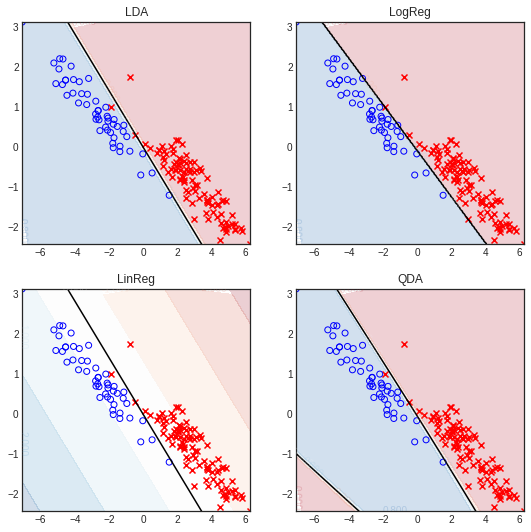

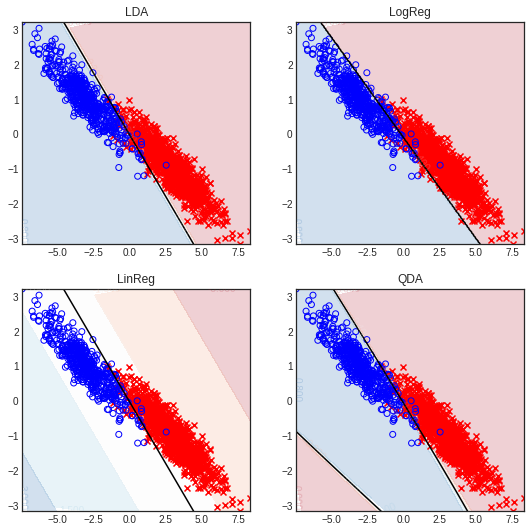

In [ ]:
X_train, y_train = data["train_A"][:, 0:2], data["train_A"][:, -1]
X_test, y_test = data["test_A"][:, 0:2], data["test_A"][:, -1]


# Note that by setting some of the entries to None you can implement and test each
# of the methods one by one.


# Your classifiers list should always look like this. Run this when you
# have implemented and tested the methods above.

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)
plot_results(X_test, y_test, classifiers)

# calculate train and test accuracy all the classifiers
print("train accuracy: ", [accuracy(X_train, y_train, classifier) for classifier in classifiers])
print("test accuracy: ", [accuracy(X_test, y_test, classifier) for classifier in classifiers])

print("train miss classification error: ", [100-accuracy(X_train, y_train, classifier) for classifier in classifiers])
print("test miss classification error: ", [100-accuracy(X_test, y_test, classifier) for classifier in classifiers])

#### Comparison


Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | *98.67* % | 98.0 %
*LogReg* | 100.0 % | 96.6 %
*LinReg* | 98.67 % | 97.92 %
*QDA* | 99.33 % | 98 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:** Misclassification error for LDA, Linear Regression,and QDA on test and training set are similar. Logistic regresssion seems to overfit the dataset because it can model single guassian distribution easily and hence fairly perform over test set as well. 


**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:** LDA, linear regression, and QDA appear to produce similar results because data is linearly separable. Even though the results of the logistic regression are not bad, the training data are obviously overfit. 

Both **LDA** and QDA yield the best results. It is because of the shared covariance matrix assumption in data generating process and the fact that LDA is a particular instance of QDA. 

### Dataset B

#### Parameter estimation and plots

parameters of Fisher LDA
p0:  0.5
p1:  0.5
mu0:  [ 3.34068896 -0.83546333]
mu1:  [-3.21670734  1.08306733]
Sigma:  [[ 3.34623467 -0.13516489]
 [-0.13516489  1.73807475]]
Logistic Regression parameters learned
b =  [1.34959157]
w =  [[-1.70518586]
 [ 1.02378538]]
Linear regression parameters learned
b =  [0.50005043]
w =  [[-0.10424575]
 [ 0.05179118]]
QDA parameters learned
p0 =  0.5
p1 =  0.5
mu0 =  [ 3.34068896 -0.83546333]
mu1 =  [-3.21670734  1.08306733]
cov0 =  [[2.53885859 1.0642112 ]
 [1.0642112  2.96007891]]
cov1 =  [[ 4.15361075 -1.33454097]
 [-1.33454097  0.51607059]]
train accuracy:  [97.0, 98.0, 97.0, 98.66666666666667]
test accuracy:  [95.85000000000001, 95.7, 95.85000000000001, 98.0]
train miss classification error:  [3.0, 2.0, 3.0, 1.3333333333333286]
test miss classification error:  [4.1499999999999915, 4.299999999999997, 4.1499999999999915, 2.0]


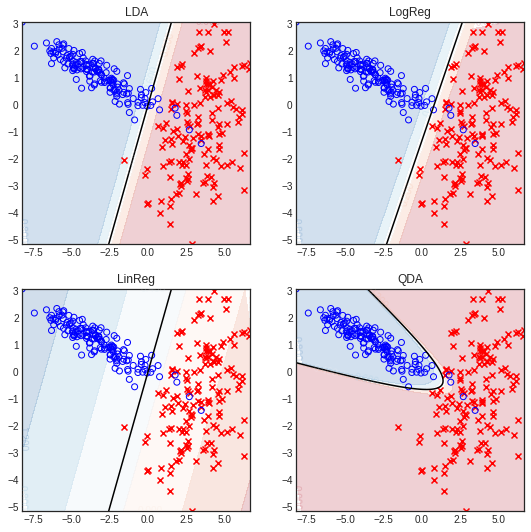

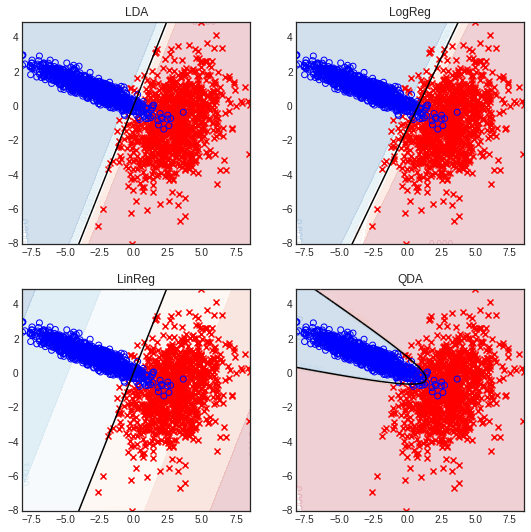

In [ ]:
X_train, y_train = data["train_B"][:, 0:2], data["train_B"][:, -1]
X_test, y_test = data["test_B"][:, 0:2], data["test_B"][:, -1]


# Your classifiers list should always look like this. Run this when you
# have implemented and tested the methods above.

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)
plot_results(X_test, y_test, classifiers)

print("train accuracy: ", [accuracy(X_train, y_train, classifier) for classifier in classifiers])
print("test accuracy: ", [accuracy(X_test, y_test, classifier) for classifier in classifiers])

# miss classification error of the model
print("train miss classification error: ", [100-accuracy(X_train, y_train, classifier) for classifier in classifiers])
print("test miss classification error: ", [100-accuracy(X_test, y_test, classifier) for classifier in classifiers])

#### Comparison



Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 97.0 % | 95.85 %
*LogReg* | 98.0 % | 95.7 %
*LinReg* | 97.0 % | 95.85 %
*QDA* | 98.67 % | 98.0 %


**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:** Misclassification error is slightly larger on training and test data of LogReg, LogReg and LinReg compare to QDA. The training data is not exactly linearly separable and work best with quadratic curve. 



**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:** LinReg, LDA and LogReg yield very similar results. QDA produces the greatest results in both the training and test sets. It make sense because class-conditionals for this dataset are Gaussians with different means and different covarience matrix. 
Even logistic regression underperforms because data is not linearly separable. 

### Dataset C

#### Parameter estimation and plots

parameters of Fisher LDA
p0:  0.375
p1:  0.625
mu0:  [ 2.79304824 -0.83838667]
mu1:  [-2.94232885 -0.9578284 ]
Sigma:  [[ 2.88039225 -0.63405081]
 [-0.63405081  5.19952435]]
Logistic Regression parameters learned
b =  [0.95918885]
w =  [[-2.2032324 ]
 [ 0.70926562]]
Linear regression parameters learned
b =  [0.50839982]
w =  [[-0.12769333]
 [-0.01700142]]
QDA parameters learned
p0 =  0.375
p1 =  0.625
mu0 =  [ 2.79304824 -0.83838667]
mu1 =  [-2.94232885 -0.9578284 ]
cov0 =  [[2.89913927 1.24581553]
 [1.24581553 2.92475448]]
cov1 =  [[ 2.86914403 -1.76197061]
 [-1.76197061  6.56438626]]
train accuracy:  [94.5, 96.0, 94.5, 94.75]
test accuracy:  [95.76666666666667, 97.73333333333333, 95.76666666666667, 96.16666666666667]
train miss classification error:  [5.5, 4.0, 5.5, 5.25]
test miss classification error:  [4.233333333333334, 2.2666666666666657, 4.233333333333334, 3.8333333333333286]


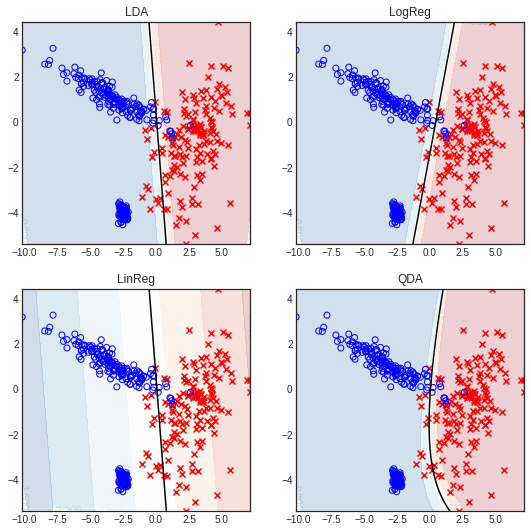

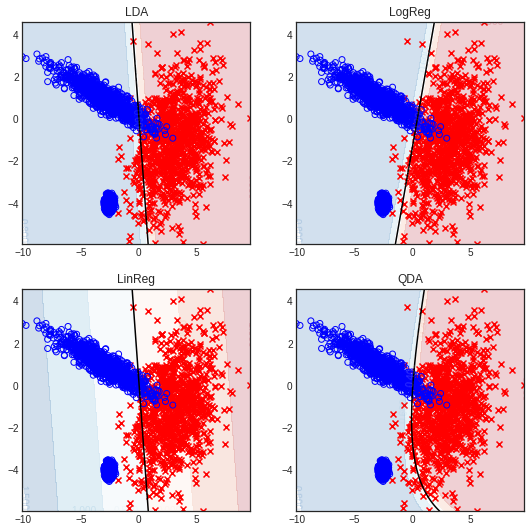

In [ ]:
X_train, y_train = data["train_C"][:, 0:2], data["train_C"][:, -1]
X_test, y_test = data["test_C"][:, 0:2], data["test_C"][:, -1]


# Your classifiers list should always look like this. Run this when you
# have implemented and tested the methods above.

classifiers = [model(X_train, y_train) for model in [LDA, LogReg, LinReg, QDA]]
plot_results(X_train, y_train, classifiers)
plot_results(X_test, y_test, classifiers)

print("train accuracy: ", [accuracy(X_train, y_train, classifier) for classifier in classifiers])
print("test accuracy: ", [accuracy(X_test, y_test, classifier) for classifier in classifiers])

# miss classification error of the model
print("train miss classification error: ", [100-accuracy(X_train, y_train, classifier) for classifier in classifiers])
print("test miss classification error: ", [100-accuracy(X_test, y_test, classifier) for classifier in classifiers])

#### Comparison



Method | Train Acc. | Test Acc.
--- | --- | ---
*LDA* | 94.5 % | 95.77%
*LogReg* | 96.0 % | 97.73 %
*LinReg* | 94.5 % |  95.77 %
*QDA* | 94.75 % | 96.17 %

---




**Question:** Is the misclassiffication error larger, smaller, or similar on the training and test data? Why?

**Answer:** Interestingly the misclassification error is higher for the training dataset than for the test dataset in all the models. It is because the data generation is not just simple gaussian distribution for each class,  but mixture of two Gaussians for one class, while the other class is a single Gaussian. The miscalssification error is similar for LDA, LinReg and QDA. 


**Question:** Which methods yield very similar/dissimilar results? Which method yield the best results? Provide an interpretation.

**Answer:**LinReg, LDA and QDA seems to have similar results. The logistic regression yield the best results because it does not make the assumption about the Class conditional distribution.